<a href="https://colab.research.google.com/github/Abdul-Karim1/Grey-Matter-Abnormalities-Detection-in-Dementia-Patients-using-Deep-Learning-on-ADNI-Images-FYP/blob/main/DementiaModellingSystem2_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install SimpleITK
!pip install vit_keras
!pip install matplotlib ipywidgets
!pip install SimpleITK
!pip install scikit-image
!pip install vit_keras
!pip install vit
!pip install tensorflow-addons
!pip install tensorflow.keras.mixed_precision
!pip install --upgrade tensorflow
!pip install tensorflow-addons
!pip install tensorflow.keras.mixed_precision
!pip install experimental
!pip install tensorflow.keras.mixed_precision
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-addons
!pip install sklearn.metrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.9/274.9 kB 9.4 MB/s eta 0:00:00
  Created wheel for tasklib: filename=tasklib-2.5.1-py3-none-any.whl size=25472 sha256=69c61dd18f284b2e7ab3e41373cbea813ab05a5987ca5dab51f4c08248720ccf
  Stored in directory: /root/.cache/pip/wheels/4c/c6/a5/dbc781785a2d22a487b78194c5f2a6cff338fa1eb42acd5762
Successfully built tasklib
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.6 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement tensorflow.keras.mixed_precision (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.mixed_precision
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.8 MB/s eta 0:

In [ ]:
from tensorflow.keras.applications import Xception
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
import cv2
import numpy as np
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import imageio
import nibabel as nib
from PIL import Image
import cv2
from skimage.restoration import denoise_wavelet
from skimage import exposure
from skimage.metrics import peak_signal_noise_ratio
from skimage.metrics import structural_similarity as ssim
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV3Large, Xception, EfficientNetB3
from vit_keras import vit
from sklearn.utils import shuffle
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV3Large, EfficientNetB3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications.efficientnet import preprocess_input
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV3Large  # Import MobileNetV3Large
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input  # Import preprocess_input for MobileNetV3
import tensorflow as tf



/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Read the existing CSV file
data = pd.read_csv('/content/drive/MyDrive/SystemDataset_CNN.csv')

# Create a DataFrame
df = pd.DataFrame(data)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'status' column to convert string labels to numbers
df['Status'] = label_encoder.fit_transform(df['status'])

# Display the updated DataFrame with numerical labels
print(df)

# Save the updated DataFrame to a new CSV file while keeping the 'Path' column
output_file_path = '/content/drive/MyDrive/Dementia_db/Updated_ImageDataset_CNN.csv'
df.to_csv(output_file_path, index=False)


                                                  Path        status  Status
0    /content/drive/MyDrive/System_dataset/Categori...  non_demented       2
1    /content/drive/MyDrive/System_dataset/Categori...  non_demented       2
2    /content/drive/MyDrive/System_dataset/Categori...  non_demented       2
3    /content/drive/MyDrive/System_dataset/Categori...  non_demented       2
4    /content/drive/MyDrive/System_dataset/Categori...  non_demented       2
..                                                 ...           ...     ...
717  /content/drive/MyDrive/System_dataset/Categori...           mci       1
718  /content/drive/MyDrive/System_dataset/Categori...  non_demented       2
719  /content/drive/MyDrive/System_dataset/Categori...           mci       1
720  /content/drive/MyDrive/System_dataset/Categori...  non_demented       2
721  /content/drive/MyDrive/System_dataset/Categori...  non_demented       2

[722 rows x 3 columns]


In [ ]:


# Load the Excel dataset
dataset = pd.read_csv('/content/drive/MyDrive/Dementia_db/Updated_ImageDataset_CNN.csv')  # Update with the actual path

# Extract image paths and labels
image_paths = dataset['Path'].tolist()
labels = dataset['Status'].tolist()

# Preprocess images and labels
image_size = 300  # For EfficientNetB3, recommended image size is 300x300

# Initialize lists to store preprocessed data
images = []
encoded_labels = []

# Load, preprocess, and store images
for image_path, label in zip(image_paths, labels):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (image_size, image_size))
    img = preprocess_input(img)  # Preprocess using EfficientNetB3 preprocessing function
    images.append(img)
    encoded_labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
encoded_labels = np.array(encoded_labels)

# Shuffle the data
images, encoded_labels = shuffle(images, encoded_labels, random_state=42)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)

# Load pre-trained EfficientNetB3 model
effnetb3_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Create a new output layer
x = effnetb3_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)  # Change the output units based on your classification

# Create the model
effnetb3_custom_model = Model(inputs=effnetb3_model.input, outputs=predictions)

# Compile the model
effnetb3_custom_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = effnetb3_custom_model.fit(
    train_images, train_labels,
    epochs=5,
    validation_data=(test_images, test_labels)
)

# Save the trained model to the specified path
effnetb3_custom_model.save('/content/drive/MyDrive/Dementia_db/CNN_effnetb3_custom_model.h5')

43941136/43941136 [==============================] - 2s 0us/step
Epoch 1/5
19/19 [==============================] - 96s 2s/step - loss: 0.7700 - accuracy: 0.7054 - val_loss: 0.7920 - val_accuracy: 0.5862
Epoch 2/5
19/19 [==============================] - 18s 924ms/step - loss: 0.6472 - accuracy: 0.7088 - val_loss: 1.1127 - val_accuracy: 0.8069
Epoch 3/5
19/19 [==============================] - 17s 905ms/step - loss: 0.5034 - accuracy: 0.8059 - val_loss: 0.9121 - val_accuracy: 0.8069
Epoch 4/5
19/19 [==============================] - 18s 938ms/step - loss: 0.3799 - accuracy: 0.8458 - val_loss: 0.9862 - val_accuracy: 0.6483
Epoch 5/5
19/19 [==============================] - 18s 926ms/step - loss: 0.3187 - accuracy: 0.8804 - val_loss: 1.5144 - val_accuracy: 0.8069


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 1s 179ms/step - loss: 1.5144 - accuracy: 0.8069
Test Loss: 1.5144
Test Accuracy: 0.8069
5/5 [==============================] - 4s 197ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        24
           2       0.81      1.00      0.89       117

    accuracy                           0.81       145
   macro avg       0.27      0.33      0.30       145
weighted avg       0.65      0.81      0.72       145

Weighted Recall: 0.8069
Weighted F1-score: 0.7207


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


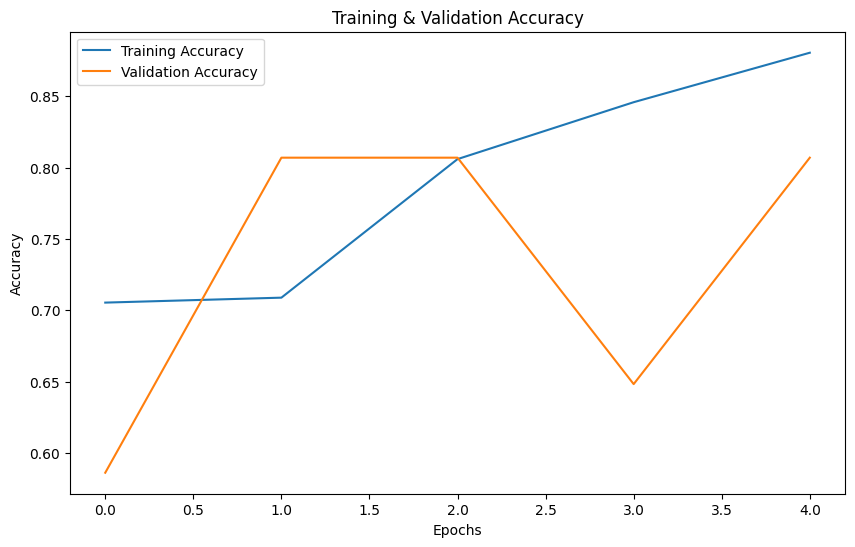

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model
test_loss, test_accuracy = effnetb3_custom_model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions for test data
test_predictions = effnetb3_custom_model.predict(test_images)
test_predictions = np.argmax(test_predictions, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(test_labels, test_predictions))

# Calculate Recall, F1-score
recall = recall_score(test_labels, test_predictions, average='weighted')
f1 = f1_score(test_labels, test_predictions, average='weighted')
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-score: {f1:.4f}")

# Plot Training & Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
pip install python-docx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 5.0 MB/s eta 0:00:00


5/5 [==============================] - 1s 185ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


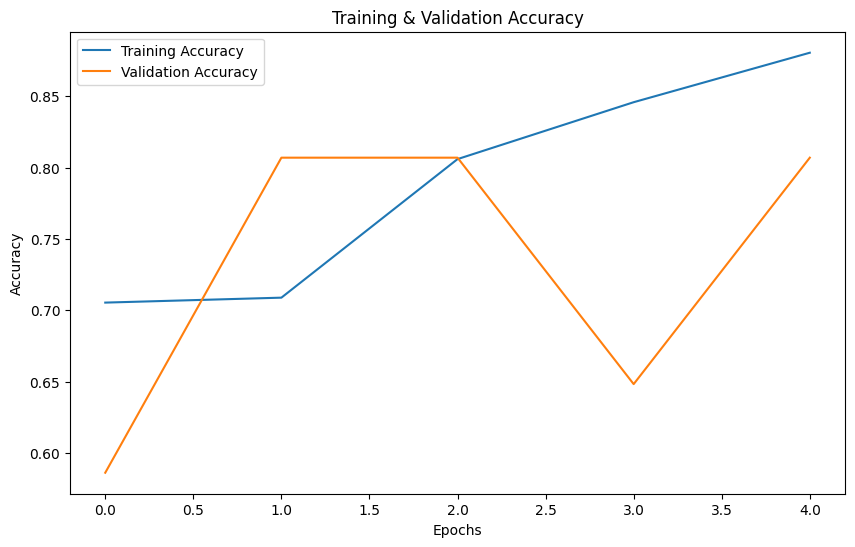

In [ ]:
from sklearn.metrics import classification_report, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from docx import Document  # Import the Document class from the docx module
from docx.shared import Inches  # Import the Inches class from the docx.shared module
import numpy as np

# Assuming the variables and models are defined as in your previous code

# Evaluate the model
test_loss, test_accuracy = effnetb3_custom_model.evaluate(test_images, test_labels)
test_predictions = effnetb3_custom_model.predict(test_images)
test_predictions = np.argmax(test_predictions, axis=1)

# Classification Report
classification_rep = classification_report(test_labels, test_predictions)

# Calculate Recall, F1-score
recall = recall_score(test_labels, test_predictions, average='weighted')
f1 = f1_score(test_labels, test_predictions, average='weighted')

# Plot Training & Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Save data to Word file
doc = Document()

doc.add_heading('Model Evaluation Report', level=1)

doc.add_paragraph(f"Test Loss: {test_loss:.4f}")
doc.add_paragraph(f"Test Accuracy: {test_accuracy:.4f}")

doc.add_heading('Classification Report', level=2)
doc.add_paragraph(classification_rep)

doc.add_paragraph(f"Weighted Recall: {recall:.4f}")
doc.add_paragraph(f"Weighted F1-score: {f1:.4f}")

doc.add_paragraph('Training & Validation Accuracy Plot:')
plt.savefig('accuracy_plot.png')  # Save the plot as an image
doc.add_picture('accuracy_plot.png', width=Inches(6.0), height=Inches(4.0))  # Use Inches class directly

doc.save('/content/drive/MyDrive/Dementia_db/model_evaluation_report.docx')
